<a href="https://colab.research.google.com/github/seanjchae/1stsem/blob/main/convert_Numpy_to_Tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install awkward
!pip install uproot

In [ ]:
#!/usr/bin/env python

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import awkward as ak
import numpy as np
import pandas as pd
import uproot
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import glob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
netarch = [128, 128]

# Defining model
seqmodel = keras.Sequential()
seqmodel.add(keras.Input(shape=(21,)))
for anet in netarch:
    seqmodel.add(layers.Dense(anet, activation=None))
    seqmodel.add(layers.LeakyReLU())
    seqmodel.add(layers.Dropout(rate=0.05)) ## dropout rate 조절
seqmodel.add(layers.Dense(1, activation='softplus'))
seqmodel.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2816      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#file_path = "/content/drive/MyDrive/PositiveResampler/4top_ex2_delphes_98.root"
file_path = "/content/drive/MyDrive/PositiveResampler/*.root"
path_list = glob.glob(file_path)

In [ ]:
def to_np_array(ak_array, maxN=100, pad=0):
    return ak.fill_none(ak.pad_none(ak_array, maxN, clip=True, axis=-1), pad).to_numpy()


In [ ]:
!pip install awkward_pandas

### 1. Read Tree
 - Merge files (two files)

In [ ]:
for idx,fName in enumerate(path_list):
    df = uproot.open(fName+':Delphes')

    if idx == 0:
        df_treeE = df.arrays(filter_name=["Event.Weight"],library='pd')
        df_treeJ = df.arrays(filter_name=["GenJet.PT"])
        df_treeM = df.arrays(filter_name=["GenMissingET.MET"])
        print(idx,len(df_treeJ))
    else:
        tempE = df.arrays(filter_name=["Event.Weight"],library='pd')
        tempJ = df.arrays(filter_name=["GenJet.PT"])
        tempM = df.arrays(filter_name=["GenMissingET.MET"])
        df_treeE = pd.concat([df_treeE, tempE], ignore_index = True)
        df_treeJ = ak.concatenate([df_treeJ, tempJ], axis=0)
        df_treeM = ak.concatenate([df_treeM, tempM], axis=0)
        print(idx,len(df_treeJ))

0 4040
1 10504


In [ ]:
for idx,fname in enumerate(path_list) :
  print(fname)

/content/drive/MyDrive/PositiveResampler/4top_ex2_delphes_98.root
/content/drive/MyDrive/PositiveResampler/4top_ex2_delphes_94.root


In [ ]:
df_treeMet = pd.DataFrame(to_np_array(df_treeM['GenMissingET.MET'],maxN=1))
df_treeMet.rename(columns={'0':'20'}, inplace=True)
df_treeJet = pd.DataFrame(to_np_array(df_treeJ['GenJet.PT'], maxN=20))





df_sum = pd.concat([df_treeJet, df_treeMet], axis=1)
del df_treeJ
del df_treeM
#del df_treeMet
#del df_treeJet


In [ ]:
df_treeMet

,0
0,61.030010
1,52.745823
2,8.251836
3,124.092018
4,26.758356
...,...
10499,89.659584
10500,84.951416
10501,150.490570
10502,70.767769


In [ ]:
df_treeJet

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,139.822464,138.269699,116.022667,70.950584,65.945961,62.591270,54.401024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,494.672028,185.799667,167.818420,165.572250,149.328384,111.631683,58.817844,40.621841,36.680298,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,209.138321,184.151550,177.874954,112.873985,70.848320,67.568268,50.470459,47.237350,41.803635,38.756111,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,104.964256,97.092773,87.416336,86.908684,67.273697,50.520344,45.613281,37.628304,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,306.368042,263.491241,155.402390,83.953728,65.966393,64.965370,44.716518,42.595612,36.442478,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499,201.057938,129.404663,110.230919,69.966057,58.046879,52.872910,45.717987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10500,89.933014,69.233444,46.271919,45.616631,43.315784,37.363205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10501,240.016907,76.515976,72.782585,55.484756,54.666130,49.824581,48.612789,47.739746,37.486916,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10502,270.460449,187.432449,178.823761,176.928146,165.703186,61.283554,44.859112,40.625854,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaler_E = MinMaxScaler(feature_range=(0, 1))
input_features = pd.DataFrame(scaler_E.fit_transform(df_sum.iloc[:,:21]), columns=df_sum.columns[:21])
del df_sum

In [ ]:
weights = df_treeE['Event.Weight']
targetweights = weights/max( weights.max(), -weights.min() )
del df_treeE


In [ ]:
print(input_features)

             0         1         2         3         4         5         6   \
0      0.040046  0.067006  0.089000  0.141003  0.182901  0.253583  0.250630   
1      0.205717  0.100706  0.148523  0.329049  0.414163  0.452265  0.270978   
2      0.072408  0.099538  0.160080  0.224319  0.196498  0.273747  0.232521   
3      0.023771  0.037810  0.056126  0.172717  0.186584  0.204678  0.210144   
4      0.117802  0.155793  0.134255  0.166845  0.182958  0.263201  0.206013   
...         ...       ...       ...       ...       ...       ...       ...   
10499  0.068635  0.060720  0.082344  0.139047  0.160993  0.214210  0.210626   
10500  0.016753  0.018056  0.008843  0.090656  0.120136  0.151374  0.000000   
10501  0.086824  0.023220  0.039309  0.110267  0.151617  0.201860  0.223963   
10502  0.101038  0.101864  0.161170  0.351617  0.459578  0.248285  0.206669   
10503  0.057662  0.089184  0.083517  0.182978  0.253470  0.368840  0.371505   

             7         8         9   ...        11 

### 2. Convert df to array

In [ ]:
#1 convert input feature
input_features = input_features.astype(np.float32)
input_features_arr = input_features.values
input_features_arr

array([[0.04004576, 0.06700569, 0.08899975, ..., 0.        , 0.        ,
        0.07478791],
       [0.20571709, 0.1007064 , 0.14852306, ..., 0.        , 0.        ,
        0.06460438],
       [0.07240778, 0.09953782, 0.16007996, ..., 0.        , 0.        ,
        0.0099091 ],
       ...,
       [0.0868243 , 0.02321976, 0.03930855, ..., 0.        , 0.        ,
        0.18475942],
       [0.10103771, 0.10186411, 0.16117032, ..., 0.        , 0.        ,
        0.08675829],
       [0.05766211, 0.08918404, 0.08351713, ..., 0.        , 0.        ,
        0.00251077]], dtype=float32)

In [ ]:
# convert weight
target_weights_arr  = targetweights.values.to_numpy(dtype=np.float32)
target_weights_arr

array([[ 1.  ],
       [ 1.  ],
       [ 0.99],
       ...,
       [-0.99],
       [ 1.  ],
       [ 0.99]], dtype=float32)

### 3. Training

In [ ]:
earlystopping_callback = keras.callbacks.EarlyStopping(patience=30, min_delta=1e-4)
opt = keras.optimizers.Adam(learning_rate=1e-4)
tf.debugging.set_log_device_placement(True)
with tf.device('/device:GPU:1'):
    seqmodel.compile(optimizer=opt, loss='MSE')
    #seqmodel.fit(input_features_tensor, target_weights_tensor, batch_size=128, epochs=10, validation_split=0.4, callbacks=[])
    seqmodel.fit(input_features_arr, target_weights_arr, batch_size=128, epochs=10, validation_split=0.4, callbacks=[])
    #history = seqmodel.fit(input_features_arr, target_weights_arr, batch_size=128, epochs=10, validation_split=0.4, callbacks=[earlystopping_callback])


Epoch 1/10
50/50 [==============================] - 1s 8ms/step - loss: 0.9072 - val_loss: 0.8712
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8602 - val_loss: 0.8504
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8491 - val_loss: 0.8470
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8471 - val_loss: 0.8466
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8473 - val_loss: 0.8466
Epoch 6/10
50/50 [==============================] - 0s 5ms/step - loss: 0.8473 - val_loss: 0.8466
Epoch 7/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8477 - val_loss: 0.8465
Epoch 8/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8465 - val_loss: 0.8464
Epoch 9/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8475 - val_loss: 0.8464
Epoch 10/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8469 - val_loss: 0.8464


Epoch 1/50
50/50 [==============================] - 1s 7ms/step - loss: 0.8903 - val_loss: 0.8631
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.8548 - val_loss: 0.8487
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.8482 - val_loss: 0.8468
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.8476 - val_loss: 0.8466
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.8474 - val_loss: 0.8466
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.8466 - val_loss: 0.8465
Epoch 7/50
50/50 [==============================] - 0s 6ms/step - loss: 0.8469 - val_loss: 0.8466
Epoch 8/50
50/50 [==============================] - 0s 5ms/step - loss: 0.8472 - val_loss: 0.8465
Epoch 9/50
50/50 [==============================] - 0s 5ms/step - loss: 0.8465 - val_loss: 0.8465
Epoch 10/50
50/50 [==============================] - 0s 5ms/step - loss: 0.8467 - val_loss: 0.8465
Epoch 11/50
50/50 [

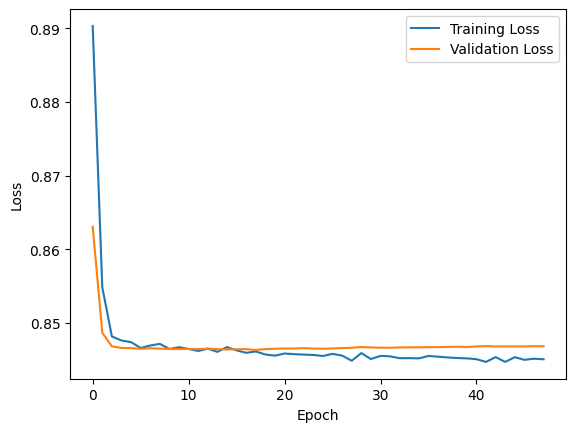

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Assuming seqmodel is your Keras model

# Define early stopping callback
earlystopping_callback = keras.callbacks.EarlyStopping(patience=30, min_delta=1e-4)

# Define optimizer
opt = keras.optimizers.Adam(learning_rate=1e-4)

# Compile the model
seqmodel.compile(optimizer=opt, loss='MSE')

# Create a list to store the training history
history = seqmodel.fit(input_features_arr, target_weights_arr, batch_size=128, epochs=50, validation_split=0.4, callbacks=[earlystopping_callback])

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
yout = seqmodel.predict(input_features)

329/329 [==============================] - 0s 1ms/step


In [ ]:
print(yout)

[[0.46338272]
 [0.31335238]
 [0.3739847 ]
 ...
 [0.43398914]
 [0.3513903 ]
 [0.2558665 ]]


[[0.4687125 ]
 [0.32302022]
 [0.36952904]
 ...
 [0.4435569 ]
 [0.35351735]
 [0.24782927]]


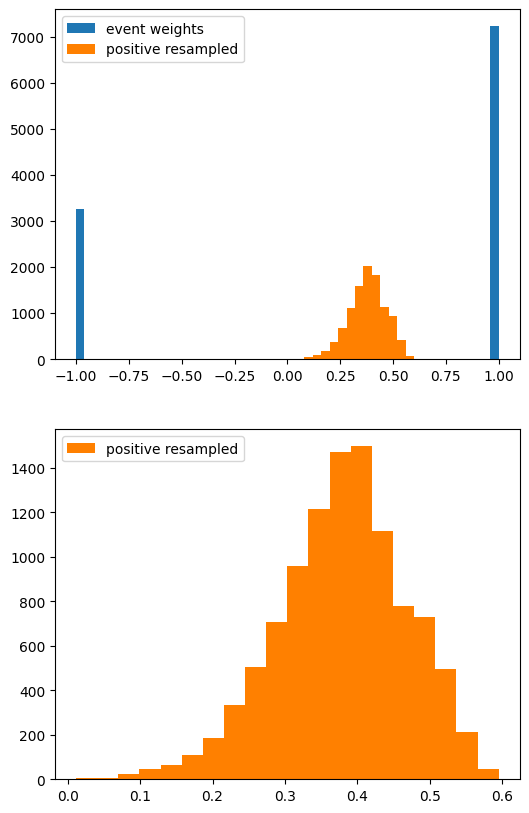

In [ ]:
print(yout[0:])
fig,ax = plt.subplots(2,1, figsize=(6,10))
plt.sca(ax[0])
plt.hist(targetweights, range=(-1, 1), bins=50, log=False, label='event weights')
plt.hist(yout[:,0], range=(-1, 1), color=(1.0, 0.5, 0.0), bins=50, label='positive resampled')
plt.legend()
plt.sca(ax[1])
plt.hist(yout[:,0], bins=20, color=(1.0, 0.5, 0.0), label='positive resampled')
plt.legend()
plt.show()

In [ ]:
print(targetweights)
#targetweights = ak.flatten(targetweights)
#print(targetweights)

0                        [1.0]
1                        [1.0]
2         [0.9900000186497228]
3                        [1.0]
4         [0.9900000186497228]
                 ...          
10499    [-0.9900000186497228]
10500                    [1.0]
10501    [-0.9900000186497228]
10502                    [1.0]
10503     [0.9900000186497228]
Name: Event.Weight, Length: 10504, dtype: awkward


In [ ]:
#var = df['Jet.PT']
#print("jet_pt",np.shape(var))
#print(np.array(var))
#ak.flatten(var)
#print(np.shape(var))
#print(target_weights_arr)
#print(np.shape(target_weights_arr))
#print(var)

#var2 =  df['leppt'] + df['met']
#print(np.shape(var2),"lepmet")
#print(np.shape(targetweights))
#print(targetweights)

jet_pt (6464,)
[[ 1.  ]
 [ 1.  ]
 [ 0.99]
 ...
 [-0.99]
 [ 1.  ]
 [ 0.99]]
(10504, 1)
<TBranchElement 'Jet.PT' at 0x7f0a6f9ab6a0>


In [ ]:
jet_pt = []

for i in range(len(path_list)) :
  tree = uproot.open(path_list[i])['Delphes']
  jetpt = tree['Jet.PT'].array()
  #lep_met = tree['']
  jet_pt.append(jetpt)

print(jet_pt)
jet_pt = ak.flatten(jet_pt)
print(type(jet_pt))
print(len(jet_pt))
print(len(targetweights))
#jet_pt = jet_pt.to_list()
print(jet_pt)
print(targetweights)

#result = (jet_pt)*(targetweights)
#jet_pt = ak.flatten(jet_pt)
#jet_pt = list(jet_pt)
#jet_pt = jet_pt.to_list()
#print(jet_pt)
#print(np.shape(jet_pt))
#jet_pt = ak.flatten(jet_pt)
#print(len(jet_pt))

[<Array [[164, 144, 81.3, 77.3, 70, 51.3], ...] type='4040 * var * float32'>, <Array [[123, 116, 82.6, ..., 46.2, 43.1], ...] type='6464 * var * float32'>]
<class 'awkward.highlevel.Array'>
10504
10504
[[164, 144, 81.3, 77.3, 70, 51.3], ..., [184, 163, 132, ..., 56.4, 53.3, 41.5]]
0                        [1.0]
1                        [1.0]
2         [0.9900000186497228]
3                        [1.0]
4         [0.9900000186497228]
                 ...          
10499    [-0.9900000186497228]
10500                    [1.0]
10501    [-0.9900000186497228]
10502                    [1.0]
10503     [0.9900000186497228]
Name: Event.Weight, Length: 10504, dtype: awkward


In [ ]:
targetweights = target_weights_arr
targetweights = ak.flatten(targetweights)
print(np.shape(targetweights))
print(targetweights)

[10504]
[1, 1, 0.99, 1, 0.99, 0.99, 1, -0.99, ..., 1, 0.99, 1, -0.99, 1, -0.99, 1, 0.99]


In [ ]:
print('jet_pt',type(jet_pt),jet_pt)
print('targetweights',type(targetweights),targetweights)
print('yout',yout)
yout =  list(yout)
yout = ak.flatten(yout)
print('yout[0:]',yout[0:])


jet_pt <class 'awkward.highlevel.Array'> [[164, 144, 81.3, 77.3, 70, 51.3], ..., [184, 163, 132, ..., 56.4, 53.3, 41.5]]
targetweights <class 'awkward.highlevel.Array'> [1, 1, 0.99, 1, 0.99, 0.99, 1, -0.99, ..., 1, 0.99, 1, -0.99, 1, -0.99, 1, 0.99]
yout [[0.4687125 ]
 [0.32302022]
 [0.36952904]
 ...
 [0.4435569 ]
 [0.35351735]
 [0.24782927]]
yout[0:] [0.469, 0.323, 0.37, 0.444, 0.37, 0.402, ..., 0.481, 0.542, 0.444, 0.354, 0.248]


In [ ]:
leading_jet = []

for i in range(len(jet_pt)) :
  leading = jet_pt[i][0]
  leading_jet.append(leading)

print(leading_jet)

[163.86793518066406, 485.75653076171875, 194.4183807373047, 107.46513366699219, 344.6103210449219, 153.87257385253906, 218.3799591064453, 199.0291290283203, 428.862060546875, 185.71336364746094, 444.22222900390625, 175.71463012695312, 182.826904296875, 129.0382537841797, 152.12490844726562, 154.01800537109375, 131.71595764160156, 264.9428405761719, 431.31146240234375, 915.3981323242188, 479.3347473144531, 235.2933349609375, 140.9844207763672, 190.35128784179688, 716.6515502929688, 137.59327697753906, 136.13113403320312, 371.5805358886719, 268.8198547363281, 172.9787139892578, 300.1018371582031, 248.7521209716797, 111.36714935302734, 316.3182067871094, 330.1045227050781, 379.3948974609375, 274.7607727050781, 399.15142822265625, 127.61795043945312, 265.476318359375, 211.44143676757812, 472.7144775390625, 186.60745239257812, 138.71511840820312, 138.9650115966797, 273.41375732421875, 217.63511657714844, 191.38877868652344, 305.1513671875, 177.6236572265625, 182.64471435546875, 144.39253234

In [ ]:
!pip install mplhep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 7.3 MB/s eta 0:00:00


jet_pt [[164, 144, 81.3, 77.3, 70, 51.3], ..., [184, 163, 132, ..., 56.4, 53.3, 41.5]]
targetweights [1, 1, 0.99, 1, 0.99, 0.99, 1, -0.99, ..., 1, 0.99, 1, -0.99, 1, -0.99, 1, 0.99]
yout [0.469, 0.323, 0.37, 0.444, 0.37, 0.402, ..., 0.481, 0.542, 0.444, 0.354, 0.248]


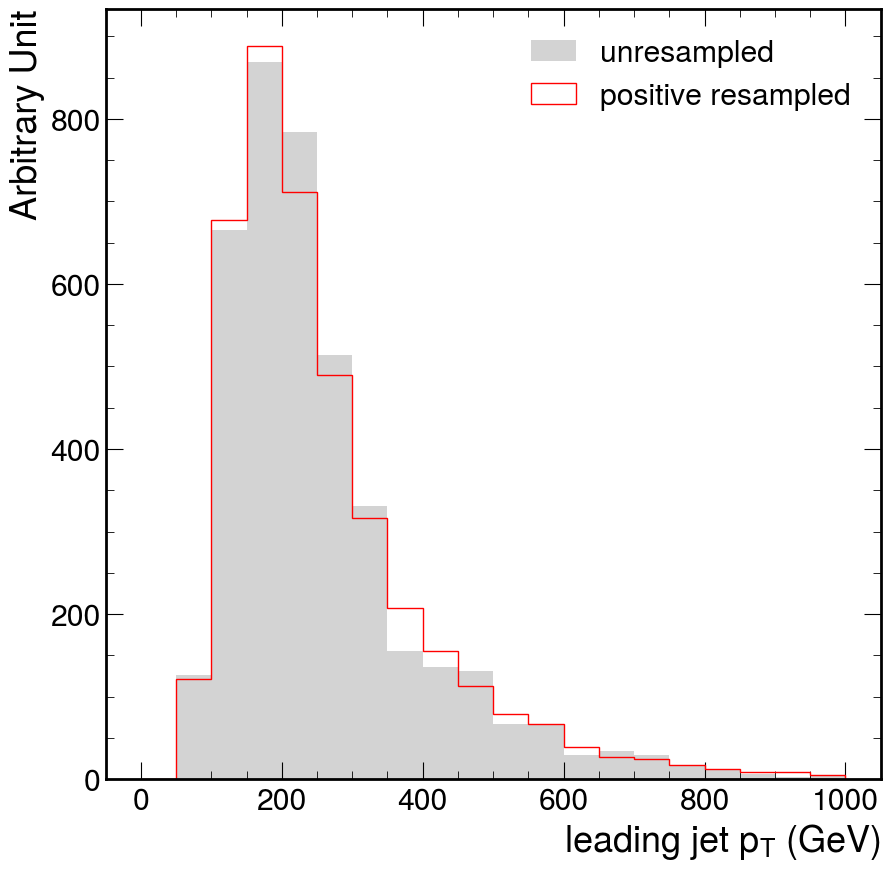

In [ ]:
print('jet_pt',jet_pt)
print('targetweights',targetweights)
print('yout',yout)

import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams["figure.figsize"]=(10,10)
xrange=(0,1000)
nbins = 20

h1 = plt.hist(leading_jet, bins=nbins, range=xrange, weights=targetweights, histtype ='stepfilled', color='lightgrey',label='unresampled')
h2 = plt.hist(leading_jet, bins=nbins, range=xrange, weights=yout, histtype='step',color ='red',label='positive resampled')
plt.legend()
plt.xlabel('leading jet $p_T$ (GeV)')
plt.ylabel('Arbitrary Unit')
plt.show()

In [ ]:
h1

(array([  0.        , 125.76989746, 665.84051514, 868.62097168,
        783.67156982, 514.30102539, 330.50030518, 154.77980042,
        135.83990479, 130.70069885,  66.75039673,  65.86019897,
         29.        ,  33.93000031,  28.96999931,  15.94009972,
         11.94999981,   5.98000002,   1.98000002,   5.        ]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 [<matplotlib.patches.Polygon at 0x7dff2ccc10c0>])

In [ ]:
h1[0] / h2[0]

<ipython-input-43-70be688ebbfa>:1: RuntimeWarning: invalid value encountered in divide
  h1[0] / h2[0]


array([       nan, 1.03367949, 0.9836687 , 0.97761234, 1.10113261,
       1.05134084, 1.04361845, 0.74651708, 0.87589902, 1.15238795,
       0.84037989, 0.97917776, 0.74552231, 1.27227367, 1.1909424 ,
       0.96106203, 1.02563828, 0.70667795, 0.24701271, 1.11114426])

<ipython-input-45-fbe633ab169d>:5: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(x=np.arange(25,1000,50), y=h1[0]/h2[0], xerr=25, yerr=0, fmt='o',color='black')


(0.0, 2.0)

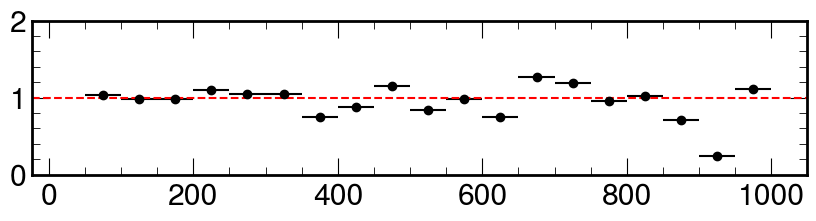

In [ ]:
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams["figure.figsize"]=(10,2)

plt.errorbar(x=np.arange(25,1000,50), y=h1[0]/h2[0], xerr=25, yerr=0, fmt='o',color='black')
plt.axhline(y=1,color='red',linestyle='--')
np.arange(25,1000,50)
plt.ylim(0,2)

In [ ]:
sub_leading_jet = []

for i in range(len(jet_pt)):
  leading = jet_pt[i][1]
  sub_leading_jet.append(leading)

print(sub_leading_jet)

[144.2569580078125, 193.31044006347656, 178.95440673828125, 98.32669830322266, 271.88995361328125, 152.50926208496094, 200.3503875732422, 178.5250701904297, 130.9866943359375, 167.31773376464844, 327.1308288574219, 140.11297607421875, 160.40640258789062, 95.91157531738281, 140.6566162109375, 102.45276641845703, 130.65960693359375, 239.73394775390625, 223.14297485351562, 257.8853759765625, 359.2294616699219, 164.44683837890625, 116.46884155273438, 139.20140075683594, 300.8656921386719, 115.2656478881836, 132.20196533203125, 307.71978759765625, 227.6236572265625, 130.6586151123047, 158.78857421875, 205.93382263183594, 104.01213073730469, 168.67930603027344, 207.80560302734375, 185.1700439453125, 172.26808166503906, 304.4020690917969, 126.9658203125, 228.4788360595703, 85.32037353515625, 250.88082885742188, 169.53955078125, 67.37525177001953, 119.249267578125, 92.91928100585938, 157.3600616455078, 140.6011505126953, 153.8430938720703, 151.8999481201172, 123.58080291748047, 119.74799346923

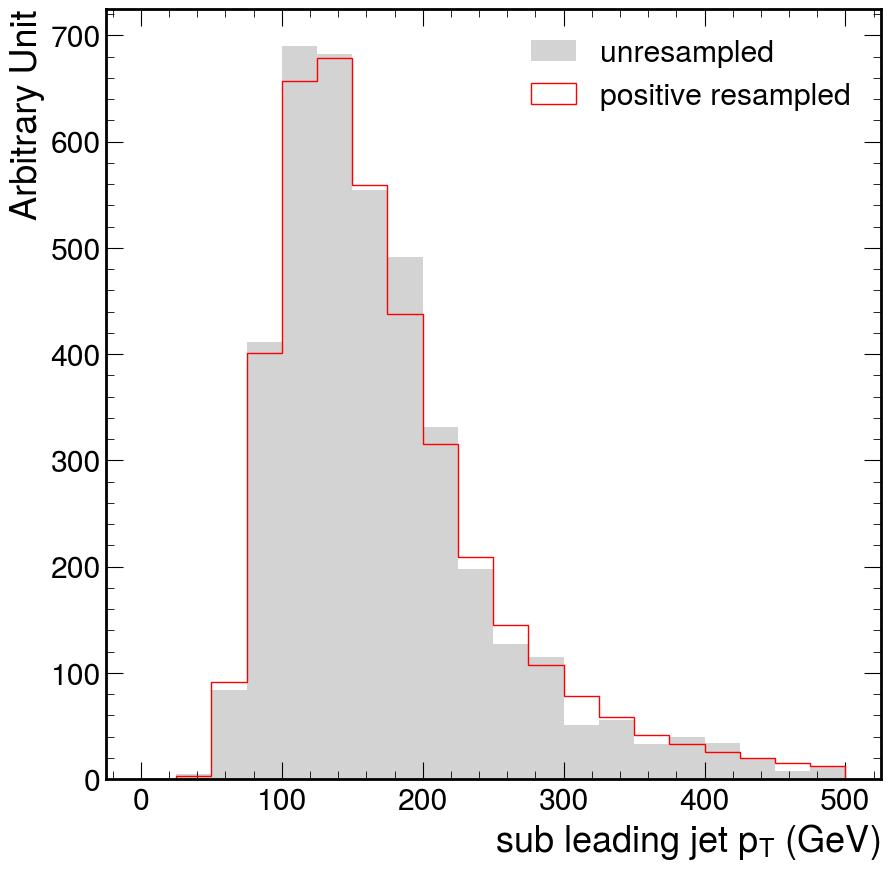

In [ ]:
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams["figure.figsize"]=(10,10)
xrange=(0,500)
nbins = 20

h3 = plt.hist(sub_leading_jet, bins=nbins, range=xrange, weights=targetweights, histtype ='stepfilled', color='lightgrey',label='unresampled')
h4 = plt.hist(sub_leading_jet, bins=nbins, range=xrange, weights=yout,histtype='step',color ='red',label='positive resampled')
plt.legend()
plt.xlabel('sub leading jet $p_T$ (GeV)')
plt.ylabel('Arbitrary Unit')
plt.show()

In [ ]:
h3

(array([  0.        ,   4.98999977,  83.89990234, 411.35110474,
        690.09979248, 682.65039062, 554.10101318, 491.13101196,
        331.40060425, 197.74060059, 126.7303009 , 114.78019714,
         50.86029816,  55.90019989,  32.95980072,  39.95000076,
         33.96009827,  19.93009949,   7.98999977,  10.97999954]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.,
        275., 300., 325., 350., 375., 400., 425., 450., 475., 500.]),
 [<matplotlib.patches.Polygon at 0x7ef0523b4b20>])

<ipython-input-53-17b4ec20ddec>:4: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(x=np.arange(20,500,25), y=h3[0]/h4[0], xerr=12.5, yerr=0, fmt='o',color='black')


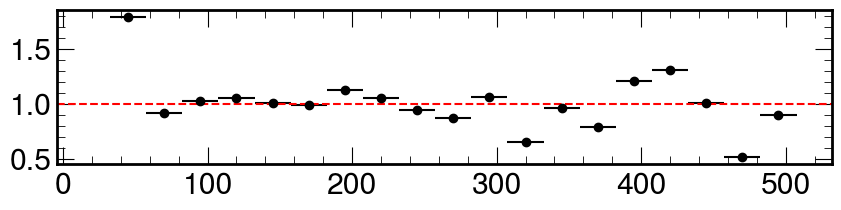

In [ ]:
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams["figure.figsize"]=(10,2)
plt.errorbar(x=np.arange(20,500,25), y=h3[0]/h4[0], xerr=12.5, yerr=0, fmt='o',color='black')
plt.axhline(y=1,color='red',linestyle='--')

In [ ]:
np.arange(20,500,25)

array([ 20,  45,  70,  95, 120, 145, 170, 195, 220, 245, 270, 295, 320,
       345, 370, 395, 420, 445, 470, 495])

In [ ]:
jetnum = []

for i in range(len(jet_pt)):
  numjet = len(jet_pt[i])
  jetnum.append(numjet)

print(jetnum)

NameError: ignored

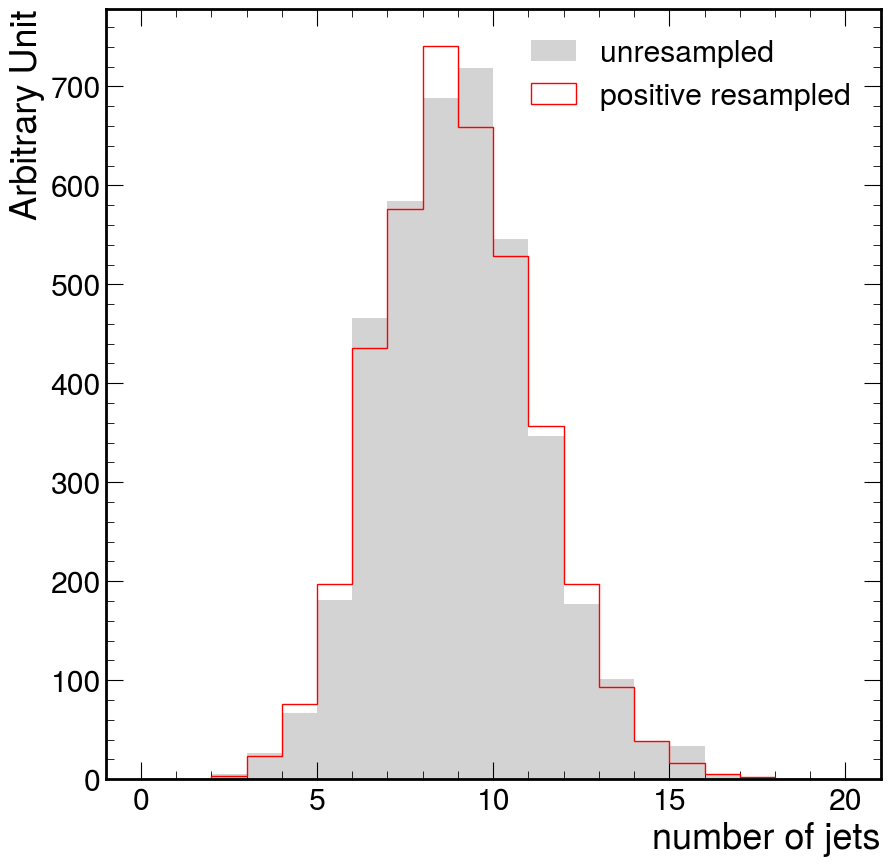

In [ ]:

plt.style.use(hep.style.CMS)
plt.rcParams["figure.figsize"]=(10,10)
xrange=(0,20)
nbins = 20

h5 = plt.hist(jetnum, bins=nbins, range=xrange, weights=targetweights, histtype ='stepfilled', color='lightgrey',label='unresampled')
h6 = plt.hist(jetnum, bins=nbins, range=xrange, weights=yout,histtype='step',color ='red',label='positive resampled')
plt.legend()
plt.xlabel('number of jets')
plt.ylabel('Arbitrary Unit')
plt.show()

In [ ]:
h5

(array([  0.        ,   0.        ,   4.98999977,  25.90019989,
         66.86039734, 180.78030396, 466.23059082, 584.0803833 ,
        687.94152832, 718.43103027, 545.34039307, 346.45050049,
        176.68000793, 100.80010223,  38.93989944,  32.97999954,
          3.99009991,   1.        ,   0.        ,   0.        ]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 [<matplotlib.patches.Polygon at 0x7ef051aeae30>])

In [ ]:
h5[0]/h6[0]

<ipython-input-80-60450feb1ad8>:1: RuntimeWarning: invalid value encountered in divide
  h5[0]/h6[0]


array([       nan,        nan, 1.75017564, 1.1163971 , 0.88539485,
       0.91628305, 1.0699219 , 1.01389679, 0.92833488, 1.09008722,
       1.03120995, 0.96955289, 0.89692428, 1.08262342, 1.00807066,
       2.00196805, 0.7711862 , 0.52400069, 0.        ,        nan])

In [ ]:
h=np.arange(0,20,1)
print(h)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


<ipython-input-93-88655f901dbb>:5: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(x=np.arange(0,20,1), y=h5[0]/h6[0], xerr=0.5, yerr=0, fmt='o',color='black')


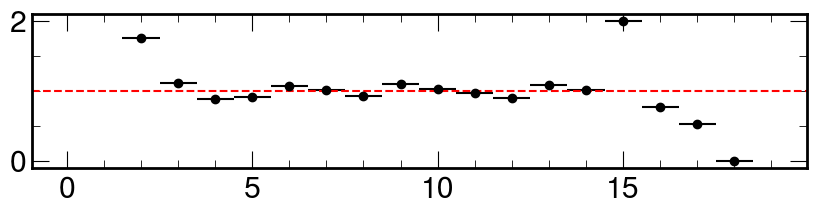

In [ ]:

import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams["figure.figsize"]=(10,2)

plt.errorbar(x=np.arange(0,20,1), y=h5[0]/h6[0], xerr=0.5, yerr=0, fmt='o',color='black')
plt.axhline(y=1,color='red',linestyle='--')

In [ ]:
ETA =[]

for i in range(len(path_list)) :
  tree = uproot.open(path_list[i])['Delphes']
  eta = tree['Jet.Eta'].array()
  ETA.append(eta)

print(ETA)

NameError: ignored

In [ ]:
HT =[]
for i in range(len(path_list)) :
  tree = uproot.open(path_list[i])['Delphes']
  ht=tree['ScalarHT.HT'].array()
  HT.append(ht)

print(HT)

NameError: ignored

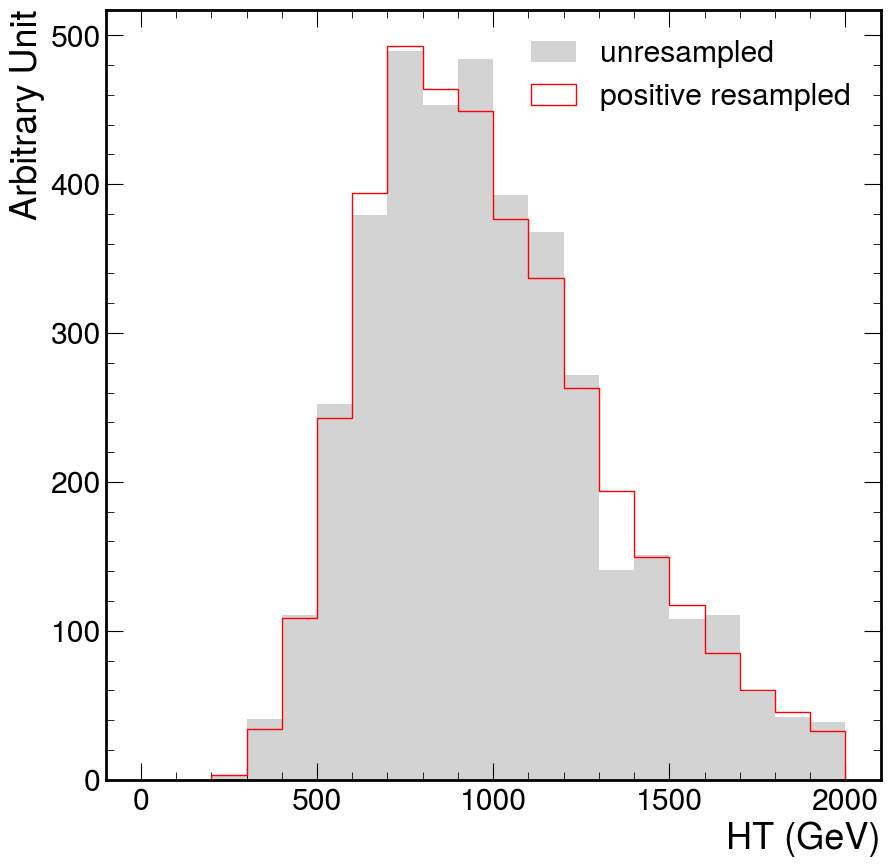

In [ ]:
#HT=ak.flatten(HT)
#print(HT)

plt.style.use(hep.style.CMS)
plt.rcParams["figure.figsize"]=(10,10)
xrange=(0,2000)
nbins = 20

h7 = plt.hist(HT, bins=nbins, range=xrange, weights=targetweights, histtype ='stepfilled', color='lightgrey',label='unresampled')
h8 = plt.hist(HT, bins=nbins, range=xrange, weights=yout,histtype='step',color ='red',label='positive resampled')
plt.legend()
plt.xlabel('HT (GeV)')
plt.ylabel('Arbitrary Unit')
plt.show()

In [ ]:
h7

(array([  0.        ,   0.        ,   3.00999999,  40.89020157,
        110.86000061, 252.56059265, 379.38009644, 489.33999634,
        453.23080444, 484.19000244, 392.36108398, 367.54031372,
        271.48071289, 140.66020203, 150.71069336, 107.94010162,
        110.82019806,  58.82040024,  41.95000076,  38.86009979]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000.]),
 [<matplotlib.patches.Polygon at 0x7ee62fa85b10>])

<ipython-input-111-eb51fe5385d4>:5: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(x=np.arange(0,2000,100), y=h7[0]/h8[0], xerr=50, yerr=0, fmt='o',color='black')


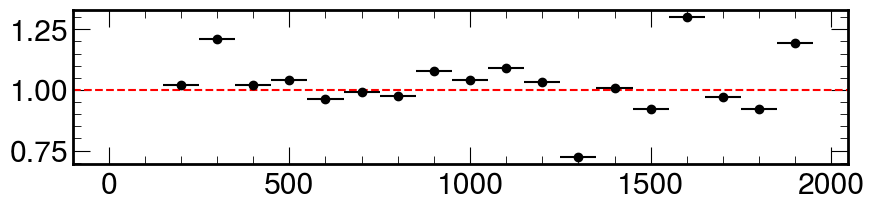

In [ ]:
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams["figure.figsize"]=(10,2)

plt.errorbar(x=np.arange(0,2000,100), y=h7[0]/h8[0], xerr=50, yerr=0, fmt='o',color='black')
plt.axhline(y=1,color='red',linestyle='--')

In [ ]:
Jet_Eta=[]
Jet_PT=[]
Jet=[]

for i in range(len(path_list)):
  print(i)
  tree = uproot.open(path_list[i])['Delphes;1']
  Jet = ak.zip({
  "PT":tree['Jet.PT'].array(),
  "Eta":tree['Jet.Eta'].array()
  })
  #Jet.append(Jet)
  Jet.append(Jet)
  Jet_Eta.append(Jet.Eta)
  Jet_PT.append(Jet.PT)

  print(len(Jet))

print("Jet",len(Jet))
print("eta",Jet_Eta)
print("pt",Jet_PT)



0


AttributeError: ignored

In [ ]:
tree = uproot.open("/content/drive/MyDrive/PositiveResampler/4top_ex2_delphes_94.root")['Delphes;1']

Jet = ak.zip({
"PT":tree['Jet.PT'].array(),
"Eta":tree['Jet.Eta'].array()
})

print(ak.num(Jet.Eta))


#for i in range(len(Jet.PT)):


[6, 4, 8, 10, 8, 12, 7, 9, 12, 7, 6, 8, ..., 8, 6, 8, 10, 9, 11, 9, 6, 8, 8, 14]


In [ ]:
eta1 =[]

for i in range(len(Jet.Eta)) :
  jet_eta=Jet.Eta[i][1]
  eta1.append(jet_eta)

print(eta1)



[-0.6530298, 0.5897092, -1.2116195, 0.3380091, 1.8952798, 2.3904772, 0.85869247, -0.36870867, -1.2557245, -0.07056317, -0.138257, 0.8844774, -0.15182048, 1.4551693, 1.2426255, -1.4754803, -1.9281787, -0.8707703, 1.088258, -1.4688132, -0.26066327, -0.88180286, -1.6983963, 1.595282, -0.36346278, 0.46381125, -0.21553905, 0.6102993, 0.40984643, -1.467866, -0.8937251, 0.520521, -0.2788608, -1.6945776, -0.05775028, -0.6856653, 0.9318898, 3.4530294, -1.5150471, 0.84188014, -1.1198426, -1.120947, -0.66766036, -1.2778175, -0.049190756, 2.947383, 0.50174814, -0.56510705, -0.16149154, 0.3657298, -2.095399, -0.3778588, -1.0963157, -0.5837684, 0.8893786, 1.1878018, 0.6694105, -1.2224379, -1.5060381, -0.9579321, 1.0005858, 0.24407843, 1.135635, -0.5019541, -1.0398891, 0.25530428, 0.5579423, 0.24188909, 1.7007328, 0.09597517, -0.9498631, 0.26383865, 0.7480853, -0.42152008, -0.40794426, -0.1149644, 1.69121, 0.77473193, -0.81967163, 1.7072499, 0.28267, -0.12509334, 0.35335547, 2.4154847, -3.1334865, -1

In [ ]:
tree = uproot.open("/content/drive/MyDrive/PositiveResampler/4top_ex2_delphes_98.root")['Delphes;1']

Jet = ak.zip({
"PT":tree['Jet.PT'].array(),
"Eta":tree['Jet.Eta'].array()
})

print(ak.num(Jet.Eta))


[6, 8, 11, 8, 8, 7, 11, 10, 8, 9, 9, ..., 6, 9, 7, 11, 9, 8, 7, 8, 9, 10, 15]


In [ ]:
eta2 =[]

for i in range(len(Jet.Eta)) :
  jet_eta=Jet.Eta[i][1]
  eta2.append(jet_eta)

print(eta2)


[-1.4041078, -1.8349456, -0.18587443, 1.2003272, 0.57578075, -0.87362, -1.2105672, -1.9185416, 2.0164871, -0.51080984, 0.2629877, -0.9802304, 0.27973968, 2.1522567, -1.2008463, 0.45112774, 0.4933534, 0.6477965, 0.025959417, -0.7586095, 1.000329, -0.24106786, 0.4566332, -0.336804, -0.52044487, -2.6313267, -0.3427439, -1.0628855, 1.795769, -0.74693584, -0.7981023, 0.29490873, 0.40224218, -0.46765792, 0.13739245, 1.5559716, 0.55028653, -0.12733378, 1.8629459, 0.1953563, 1.5319723, -0.58999777, -1.6357839, 1.8237472, -0.044779837, 0.9056513, -0.06257028, 0.12704444, 1.4549649, -2.940799, -0.30380183, 0.7905318, -0.2877234, 1.0510157, 0.63433367, -0.6513226, -1.1769171, -1.224542, 1.2676657, 0.29912725, 0.3051318, 1.0632874, -2.9000921, -1.399329, 0.70939875, -0.68683696, -1.1774058, 0.36087748, -0.33413237, -1.4413415, 1.1576623, -1.3978062, 2.5703235, -0.43408754, -0.2967458, -0.19775657, -0.65771794, -0.5312137, 0.14334574, 1.5055504, -1.3790482, -1.1413481, 0.5325511, -0.17361255, 1.441

In [ ]:
ETA=np.concatenate((eta1,eta2))
print(len(ETA))


10504


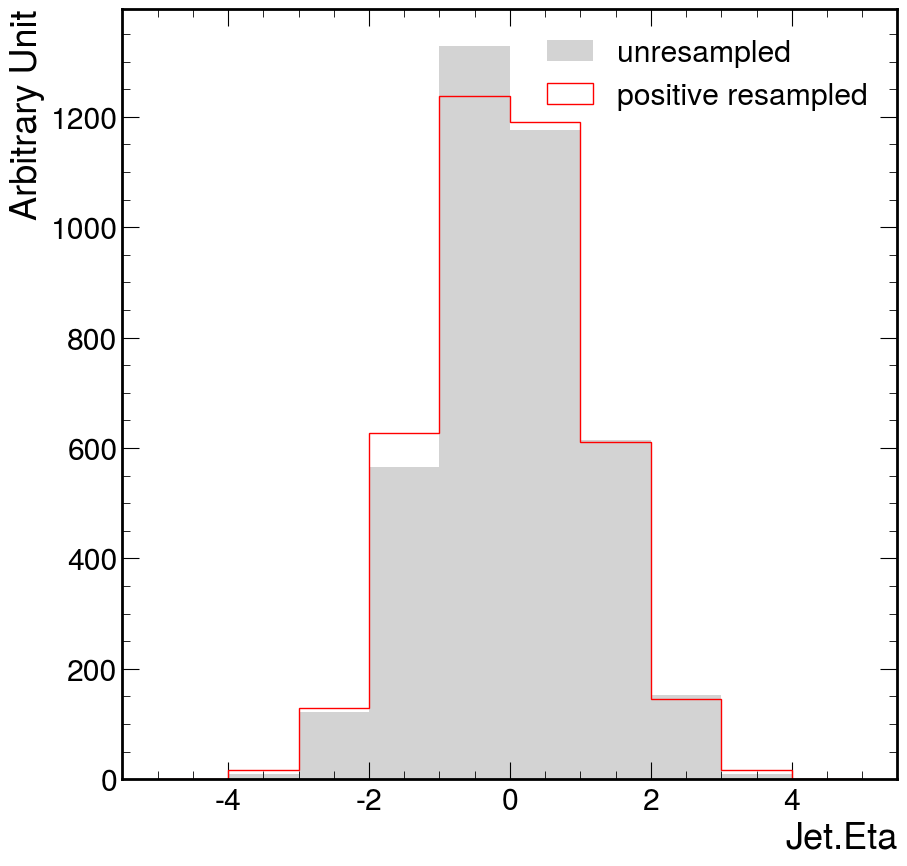

In [ ]:
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams["figure.figsize"]=(10,10)
xrange=(-5,5)
nbins = 10

h9 = plt.hist(ETA, bins=nbins, range=xrange, weights=targetweights, histtype ='stepfilled', color='lightgrey',label='unresampled')
h10 = plt.hist(ETA, bins=nbins, range=xrange, weights=yout,histtype='step',color ='red',label='positive resampled')
plt.legend()
plt.xlabel('Jet.Eta')
plt.ylabel('Arbitrary Unit')
plt.show()

In [ ]:
h9[0]/h10[0]

array([2.5475441 , 0.60214859, 0.94381411, 0.90142719, 1.07409198,
       0.98825351, 1.00430077, 1.05671335, 0.61232592, 2.86452884])

In [ ]:
h9

(array([1.00000000e+00, 9.94999981e+00, 1.20810097e+02, 5.66000122e+02,
        1.32888196e+03, 1.17624158e+03, 6.13870911e+02, 1.52720306e+02,
        9.92039871e+00, 2.00000000e+00]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [<matplotlib.patches.Polygon at 0x7d42a0fb94b0>])

In [ ]:
np.arange(-5,5,10)

array([-5])

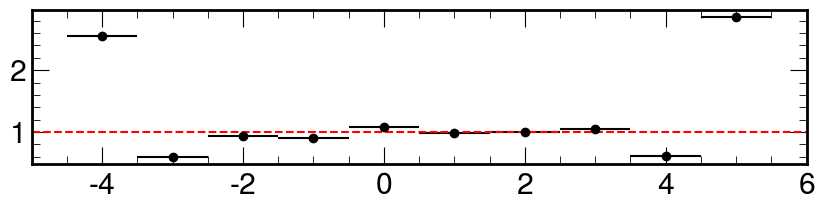

In [ ]:
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams["figure.figsize"]=(10,2)

plt.errorbar(x=[-4,-3,-2,-1,0,1,2,3,4,5], y=h9[0]/h10[0], xerr=0.5, yerr=0, fmt='o',color='black')
plt.axhline(y=1,color='red',linestyle='--')